<a href="https://colab.research.google.com/github/sehuiB/AI_Diary/blob/main/image_model/stable_diffusion_trained_%EB%8F%99%ED%99%94%EC%B1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델

### 설명

### 모델 학습




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
print(torch.__version__)

2.5.1+cu121


In [ ]:
pip install diffusers["torch"]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
pip install accelerate

In [ ]:
pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-c4ccck76
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-c4ccck76
  Resolved https://github.com/huggingface/diffusers to commit 1d2204d3a0102e8ce0254c05ce2080a8f79104c3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
#!git clone https://github.com/huggingface/diffusers  #최초만 실행
%cd diffusers
!pip install .

Cloning into 'diffusers'...
remote: Enumerating objects: 74102, done.
remote: Counting objects: 100% (358/358), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 74102 (delta 210), reused 247 (delta 137), pack-reused 73744 (from 1)
Receiving objects: 100% (74102/74102), 52.15 MiB | 27.21 MiB/s, done.
Resolving deltas: 100% (54831/54831), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=2932781 sha256=9c036e9e7c2cfb1d0cf3c6f223cce4ba34a5ff4991da5ac4884ddd821fd9a880
  Stored in directory: /tmp/pip-ephem-wheel-cache-2skgr4mo/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.0.dev0
    Uninstalling diffusers-0.32.0.dev0:
 

In [ ]:
%cd examples/text_to_image


/content/diffusers/examples/text_to_image


In [ ]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!accelerate config default


accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
!pip install wandb


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


###사전학습을 위한 데이터 전처리

In [ ]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=f5e0dd69349ba84988b8a05d155d825fcb9367a2c80cf2bc038f8d2bd990290e
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [ ]:
from glob import glob
import os
import pandas as pd
import json
from googletrans import Translator
import shutil
from PIL import Image

In [ ]:
#사진 저장 경로
folder_path ='/content/gdrive/MyDrive/ddata/Sample/train_ft'
image_folder_path = '/content/gdrive/MyDrive/ddata/Sample/image_ft'

# 이미지 폴더가 존재하지 않으면 생성
if not os.path.exists(image_folder_path):
    os.makedirs(image_folder_path)

In [ ]:
# 폴더 내의 파일 목록 가져오기
file_list = os.listdir(folder_path)

In [ ]:
# 이미지와 캡션 데이터를 저장할 리스트 생성
image_data = []

# Translator 객체 생성
translator = Translator()

# 이미지 파일과 JSON 파일 매칭하여 처리
for file_name in file_list:
    if file_name.endswith('.jpg'):
        base_name = os.path.splitext(file_name)[0]  # 이미지 파일 이름에 대응하는 JSON 파일 이름 생성
        json_file_name = base_name + '.json'
        json_file_path = os.path.join(folder_path, json_file_name)

        # JSON 파일이 존재하는지 확인
        if os.path.exists(json_file_path):
            with open(json_file_path, 'r', encoding='utf-8') as f: #jason 열기
                data = json.load(f)

            # 이미지 캡션 추출
            image_info = data.get("imageInfo", [])
            if image_info:
                image_caption = image_info[0].get("imageCaptionInfo", {}).get("imageCaption")

                # 이미지 파일 이름과 캡션을 리스트에 추가
                if image_caption:
                    # 한글 캡션을 영어로 번역
                    translated_caption = translator.translate(image_caption, src='ko', dest='en').text
                    image_data.append({'image': file_name, 'text': translated_caption})

                   # JPG 파일을 출력 폴더에 저장
                    src_image_path = os.path.join(folder_path, file_name)
                    dst_image_path = os.path.join(image_folder_path, file_name)
                    with Image.open(src_image_path) as img:
                        img.save(dst_image_path)

# 데이터프레임 생성
if image_data:
    image_df = pd.DataFrame(image_data, columns=['image', 'text'])
    print(image_df) #출력

                                 image  \
0   03_04T_03S_9791128217166_31883.jpg   
1   03_04T_03S_9791128217180_35384.jpg   
2   03_04T_03S_9791128217265_36924.jpg   
3    03_04T_03S_9791128217241_2406.jpg   
4   03_04T_03S_9791128217265_36937.jpg   
5   03_04T_03S_9791165950507_51908.jpg   
6   03_04T_03S_9791165950507_51687.jpg   
7   03_04T_03S_9791128217357_23542.jpg   
8   03_04T_03S_9791128217432_44500.jpg   
9   03_04T_03S_9791128217180_35401.jpg   
10  03_04T_03S_9791128217357_23515.jpg   
11  03_04T_03S_9791128217364_38093.jpg   
12  03_04T_03S_9791128217265_36929.jpg   
13  03_04T_03S_9791165950774_70330.jpg   
14  03_04T_03S_9791128217272_37387.jpg   
15  03_04T_03S_9791128217227_44111.jpg   
16  03_04T_03S_9791165950507_70314.jpg   
17  03_04T_03S_9791128217166_30559.jpg   
18  03_04T_03S_9791128217395_43559.jpg   
19  03_04T_03S_9791128217432_23351.jpg   
20  03_04T_03S_9791128217296_43779.jpg   
21  03_04T_03S_9791128217357_23649.jpg   
22  03_04T_03S_9791128217302_24615

In [ ]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   58 non-null     object
 1   text    58 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [ ]:
image_df.to_csv('/content/gdrive/MyDrive/ddata/Sample/ft_img_caption.csv',index=False) #csv로

In [ ]:
import os
from PIL import Image

# 학습 이미지 따로 저장

img_name=os.listdir('/content/gdrive/MyDrive/ddata/Sample/image_ft')
Pa='/content/gdrive/MyDrive/ddata/Sample/test2/'

# 출력 폴더가 존재하지 않으면 생성
if not os.path.exists(image_folder_path):
    os.makedirs(image_folder_path)

for i in range(len(img_name)):
  img=Image.open('/content/gdrive/MyDrive/ddata/Sample/image_ft'+img_name[i])
  img.save(Pa+img_name[i],'jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/ddata/Sample/train_ft03_04T_03S_9791128217180_35384.json'

- colab 환경이라서 Diffuser 파일에서 직접 이미지 경로 변경

사전학습

In [ ]:
!CUDA_VISIBLE_DEVICES="0" accelerate launch train_text_to_image_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --train_data_dir="/content/gdrive/MyDrive/ddata/Sample/ft_img_caption.csv" --caption_column="text" \
  --resolution=512 --random_flip \
  --train_batch_size=1 \
  --num_train_epochs=50 --checkpointing_steps=10000 \
  --learning_rate=1e-04 --lr_scheduler="cosine" --lr_warmup_steps=0 \
  --seed=42 \
  --output_dir="/content/gdrive/MyDrive/sd_model_fintuning_w.LoRA/fintune model" \
  --validation_prompt="children's drawing style, storybook illustration, childlike, hand-drawn style, bichu, Park stroll, joyful atmosphere, laughter-filled time, warm and soft lighting, vibrant park scene, cheerful interactions, happy pet owners, heartwarming moments, vibrant community vibes "  --report_to="wandb"

2024-11-17 17:11:30.953803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 17:11:30.975921: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 17:11:30.983579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 17:11:30.999428: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-17 17:11:32.049400: W tensorflow/compiler/tf2

### 결과 확인 및 프롬프트 실험

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and soft lighting, storybook illustration, looks like drawn by a child, charater face']


  0%|          | 0/50 [00:00<?, ?it/s]

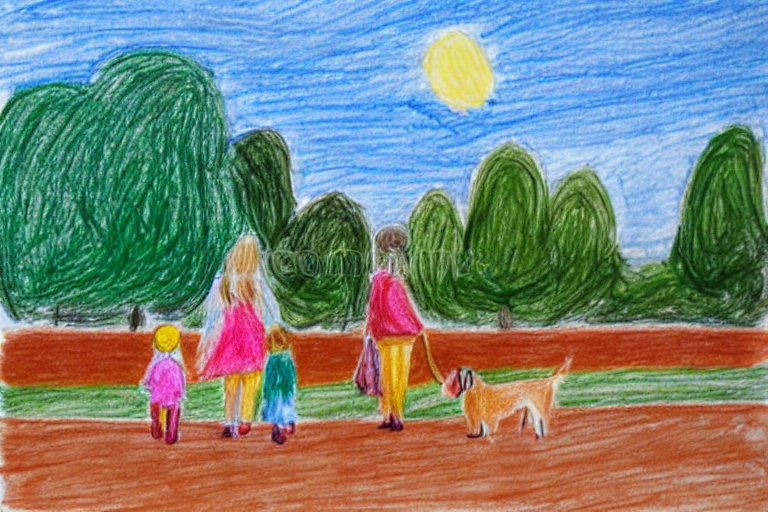

In [ ]:
prompt_list = [
    "((children's drawing style))",
    "((crayon texture))",
    "child with medium-length hair, wearing glasses",
    "young child and mother walking a small, happy dog together",
    "bright and sunny day in a park",
    "vibrant but soft colors",
    "happy, expressive, simple faces on child, mother, and dog",
    "whimsical and innocent atmosphere",
    "childlike, hand-drawn style",
    "warm and soft lighting",
    "storybook illustration",
    "looks like drawn by a child",
    "charater face"
]

negative_prompt_list = [
    'lowres',
    '(bad anatomy, bad hands:1.1)',
    'blurry face',
    'text',
    'error',
    'missing fingers',
    'missing face',
    'extra digit',
    'fewer digits',
    'cropped',
    'worst quality',
    'low quality',
    'normal quality',
    'jpeg artifacts',
    'signature',
    'watermark',
    'username',
    'blurry',
    'artist name',
    'b&w',
    'weird colors',
    '(cartoon, 3d, bad art, poorly drawn, close up, blurry:1.5)',
    '(disfigured, deformed, extra limbs:1.5)',
    '(realisticsemi realistic)',
    '(surreal)'
    '(look back)',
    '(appearance from back)',
]

seed = 42

num_inference_steps = 50 # 25
guidance_scale = 8 # 7.5
width = 768
height = 512

prompt = ', '.join(prompt_list)
negative_prompt = ', '.join(negative_prompt_list)

image = pipe(
    prompt,
    negative_prompt = negative_prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidance_scale,
    width = width,
    height = height,
    generator = torch.Generator('cuda').manual_seed(seed) if seed != 0 else None
).images[0]

image

  0%|          | 0/50 [00:00<?, ?it/s]

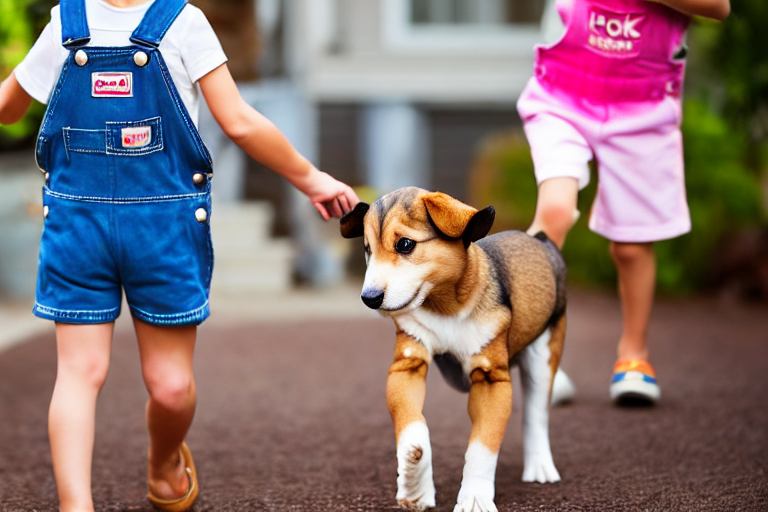

In [ ]:
prompt_list = ['A 6-year-old girl in short hair', 'overalls and T-shirts and a cute short-legged puppy who walks around the village (Clutter-Home: 0.8)', '(Masterpiece: 1.2)', '(Boke)', '(Best Quality)', '(Detailed Skin: 1.3)', '(Detailed Eyes)', '(Detailed: 1.5)']

negative_prompt_list = ['(AS-Young-Neg:1.3)', '(monochrome)', '(bad hands)', '(disfigured)', '(grain)', '(Deformed)', '(poorly drawn)', '(mutilated)', '(lowres)', '(deformed)', '(dark)', '(lowpoly)', '(CG)', '(3d)', '(blurry)', '(duplicate)', '(watermark)', '(label)', '(signature)', '(frames)', '(text)']

seed = 42

num_inference_steps = 50 # 25
guidance_scale = 12 # 7.5
width = 768
height = 512

prompt = ', '.join(prompt_list)
negative_prompt = ', '.join(negative_prompt_list)

image = pipe(
    prompt,
    negative_prompt = negative_prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidance_scale,
    width = width,
    height = height,
    generator = torch.Generator('cuda').manual_seed(seed) if seed != 0 else None
).images[0]

image